# Accès aux interfaces numériques
## Taux de couverture HD / THD  -  données 09/2019

- On suppose que ne pas avoir accès à la couverture THD correspond à un débit <= 8 Mbits/s
- Si la mojorité des personnes n'ont pas un très haut débit --> valeur = 0 et 1 sinon

In [1]:
# Ma connexion internet - données
# https://www.data.gouv.fr/fr/datasets/ma-connexion-internet-beta/#resource-b28c2daf-fd5a-4dde-b3e7-7b18de429f63
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

external_data = Path('../data/external/')
processed_data = Path('../data/processed/')
raw_data = Path('../data/raw/')
interim_data = Path('../data/interim/')

In [2]:
df = pd.read_csv(raw_data/'commune-debit-beta.csv', header=1, delimiter=';')
df

,code_insee,nom_com,code_dep,code_reg,nbr,type,inel_hd,elig_hd05,elig_hd3,elig_hd8,elig_thd30,elig_thd100,elig_thd1g,date
0,67017,Baerendorf,67,44,148,logloc,0,0,0,10,0,0,138,2019-09-30
1,38130,La Côte-Saint-André,38,84,2408,logloc,0,0,0,985,59,0,1364,2019-09-30
2,69035,Cenves,69,84,280,logloc,91,0,0,189,0,0,0,2019-09-30
3,21153,Châtellenot,21,27,125,logloc,0,0,0,125,0,0,0,2019-09-30
4,81230,Rosières,81,76,315,logloc,0,0,0,315,0,0,0,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35354,50573,Servigny,50,28,0,logloc,0,0,0,0,0,0,0,2019-09-30
35355,76674,Sévis,76,28,0,logloc,0,0,0,0,0,0,0,2019-09-30
35356,50636,Vierville,50,28,0,logloc,0,0,0,0,0,0,0,2019-09-30
35357,50438,La Ronde-Haye,50,28,0,logloc,0,0,0,0,0,0,0,2019-09-30


In [3]:
# Somme des colonnes avec débit <= 8Mbit/s et > 8Mbit/s
low_debit_cols = 'inel_hd inel_hd elig_hd3 elig_hd8'.split()
high_debit_cols = 'elig_thd30 elig_thd100 elig_thd1g'.split()

low_debit = df[low_debit_cols].sum(axis=1)
high_debit = df[high_debit_cols].sum(axis=1)
nbre = df['nbr']

df['TAUX_COUVERTURE_THD'] = (1 - high_debit / nbre) * 100

#msk = low_debit >= high_debit
#df['TAUX_COUVERTURE_THD'] = ''
#df['TAUX_COUVERTURE_THD'][msk] = 0
#df['TAUX_COUVERTURE_THD'][~msk] = 1
df = df[['code_insee', 'code_dep', 'TAUX_COUVERTURE_THD']]
df = df.rename(columns={'code_insee': 'CODE_INSEE', 'code_dep': 'DEP'})
df

,CODE_INSEE,DEP,TAUX_COUVERTURE_THD
0,67017,67,6.756757
1,38130,38,40.905316
2,69035,69,100.000000
3,21153,21,100.000000
4,81230,81,100.000000
...,...,...,...
35354,50573,50,NaN
35355,76674,76,NaN
35356,50636,50,NaN
35357,50438,50,NaN


In [5]:
# COMMUNES

communes = pd.read_csv(raw_data/'table_insee_libcom_dep.csv').drop(columns=['Unnamed: 0'])
communes

,CODE_INSEE,LIBCOM,DEP
0,01001,L'Abergement-Clémenciat,01
1,01002,L'Abergement-de-Varey,01
2,01004,Ambérieu-en-Bugey,01
3,01005,Ambérieux-en-Dombes,01
4,01006,Ambléon,01
...,...,...,...
35005,97613,M'Tsangamouji,976
35006,97614,Ouangani,976
35007,97615,Pamandzi,976
35008,97616,Sada,976


In [6]:
# MERGE des données avec les communes + code INSEE

res = df.merge(communes, on=['CODE_INSEE', 'DEP'], how='left')
temp = res['TAUX_COUVERTURE_THD']
res = res.drop(columns=['TAUX_COUVERTURE_THD'])
res['TAUX_COUVERTURE_THD'] = temp
res

,CODE_INSEE,DEP,LIBCOM,TAUX_COUVERTURE_THD
0,67017,67,Baerendorf,6.756757
1,38130,38,La Côte-Saint-André,40.905316
2,69035,69,Cenves,100.000000
3,21153,21,Châtellenot,100.000000
4,81230,81,Rosières,100.000000
...,...,...,...,...
35354,50573,50,NaN,NaN
35355,76674,76,NaN,NaN
35356,50636,50,NaN,NaN
35357,50438,50,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

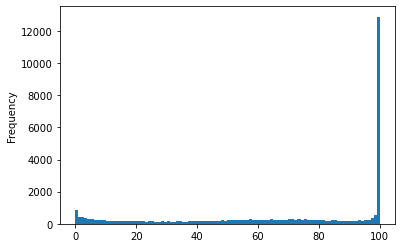

In [7]:
res['TAUX_COUVERTURE_THD'].plot(kind='hist', bins=100)

In [8]:
res['TAUX_COUVERTURE_THD'].describe()

count    34926.000000
mean        68.328907
std         34.419395
min          0.000000
25%         42.073171
50%         79.356318
75%        100.000000
max        100.000000
Name: TAUX_COUVERTURE_THD, dtype: float64

In [10]:
res.to_csv(f'{interim_data}/taux_couverture_THD.csv', index=False)